In [1]:
import librosa
import numpy as np
import librosa.display
from augment import SpecAugment
import matplotlib.pyplot as plt

In [2]:
# make a list of all training files in the LibriSpeech Dataset
files = librosa.util.find_files('./LibriSpeech/', ext=['flac'], recurse=True)

In [3]:
file = files[0]

In [4]:
file

'/Users/piyush/Desktop/LibriSpeech/8975-270782-0093.flac'

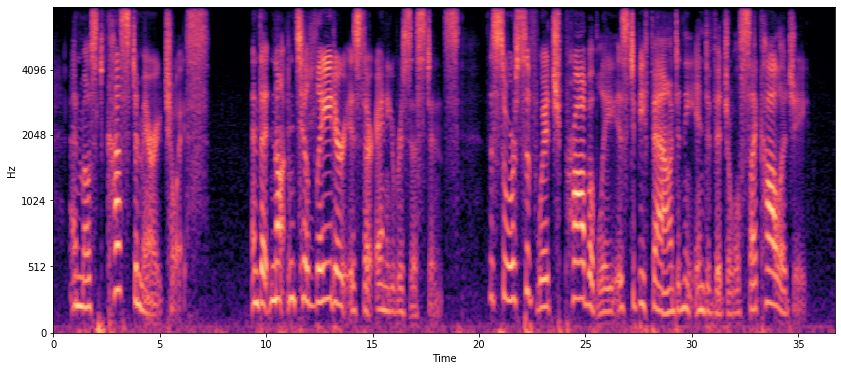

In [5]:
# Load the audio file
audio, sr = librosa.load(file)

# Extract Mel Spectrogram Features from the audio file
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=256, hop_length=128, fmax=8000)
plt.figure(figsize=(14, 6))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', y_axis='mel', fmax=8000) # Base

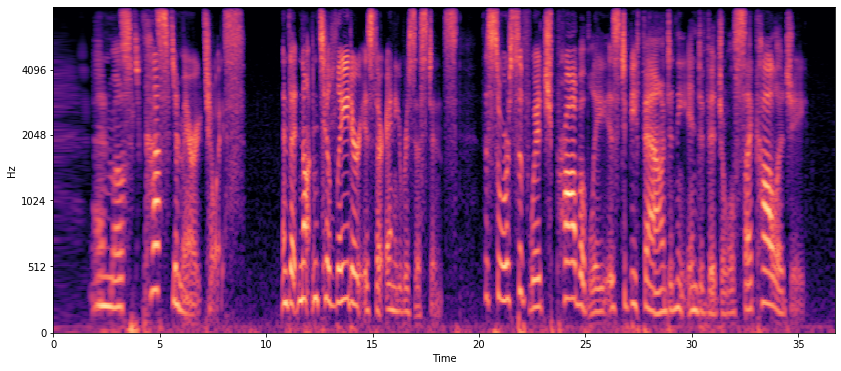

In [6]:
# Apply SpecAugment
apply = SpecAugment(mel_spectrogram, 'LB')
time_warped = apply.time_warp()
plt.figure(figsize=(14, 6))
librosa.display.specshow(librosa.power_to_db(time_warped[0, :, :, 0].numpy(), ref=np.max), x_axis='time', y_axis='mel', fmax=8000) # Time Warped

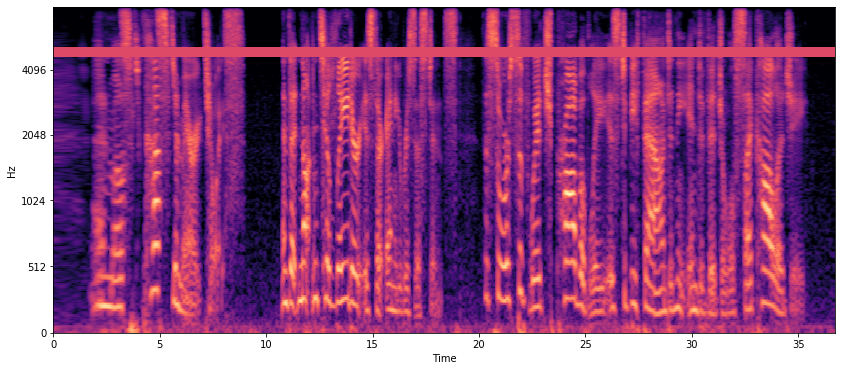

In [7]:
freq_masked = apply.freq_mask()
plt.figure(figsize=(14, 6))
librosa.display.specshow(librosa.power_to_db(freq_masked[0, :, :, 0], ref=np.max), x_axis='time', y_axis='mel', fmax=8000) # Freq Masked

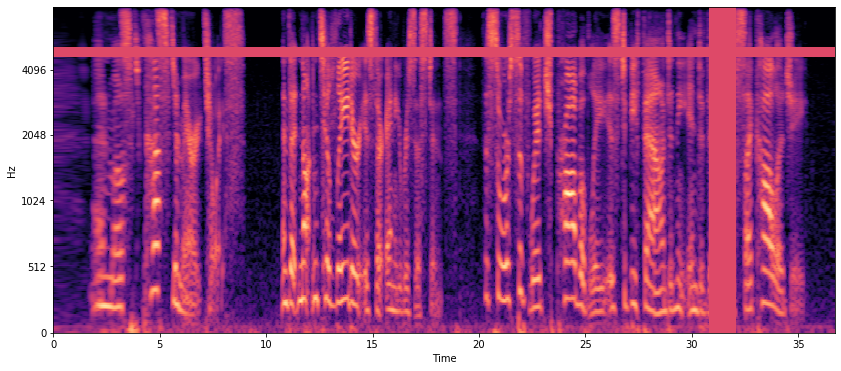

In [8]:
time_masked = apply.time_mask()
plt.figure(figsize=(14, 6))
librosa.display.specshow(librosa.power_to_db(time_masked[0, :, :, 0], ref=np.max), x_axis='time', y_axis='mel', fmax=8000) # Time Masked